In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Change working directory
os.chdir('C:\\Users\\Arpita\\Desktop\\AnalytixLabs_new\\Case Studies\\Tableau Sports CS\\')

In [4]:
# Import the data
sports = pd.read_excel("Sales Data - Sports Equipment.xlsx")

In [5]:
# Dimensions of the data
sports.shape

(16210, 11)

In [6]:
# Metadata
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16210 entries, 0 to 16209
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_No          16210 non-null  object        
 1   Order_Date        16210 non-null  datetime64[ns]
 2   Retailer_Country  16210 non-null  object        
 3   Retailer_Type     16210 non-null  object        
 4   Order_Mode        16210 non-null  object        
 5   Product_Category  16210 non-null  object        
 6   Product_Type      16210 non-null  object        
 7   Product           16210 non-null  object        
 8   Revenue           16210 non-null  float64       
 9   Quantity          16210 non-null  int64         
 10  Gross margin      16063 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [7]:
# Statistical summary of numeric variabes
sports.describe()

,Revenue,Quantity,Gross margin
count,16210.000000,16210.000000,16063.000000
mean,34778.990339,730.935225,0.459024
std,45458.840789,1281.798653,0.129516
min,0.000000,1.000000,-2.858958
25%,7752.750000,149.000000,0.366086
50%,19250.155000,354.000000,0.467061
75%,43568.527500,796.000000,0.533831
max,516135.140000,27268.000000,0.770476


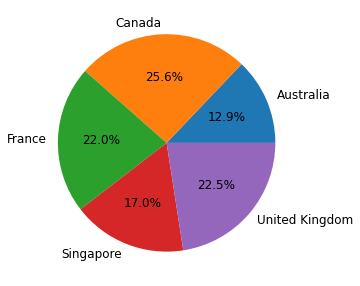

In [8]:
# Market share of each retailer country
sports.groupby('Retailer_Country').Revenue.sum().plot(kind = "pie", autopct = '%1.01f%%', figsize=(5,5),  fontsize= 12)
plt.ylabel("")
plt.show()

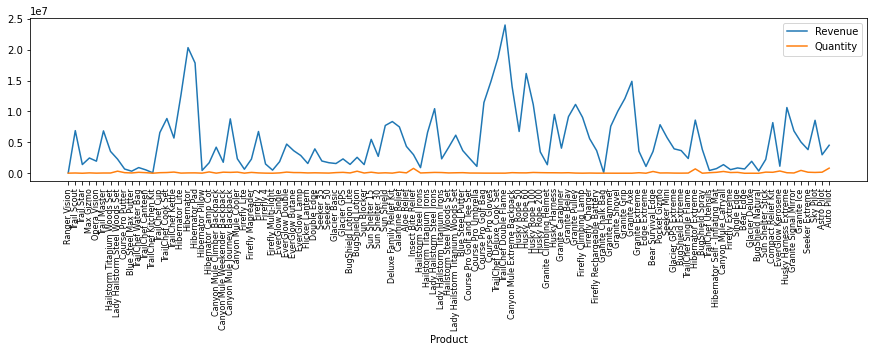

In [9]:
# Is there any relationship between the revenue and quantity sold?
sports.groupby("Product")[['Revenue','Quantity']].sum().plot(figsize = (15,3))
plt.xticks(range(0, len(sports.Product.unique())), sports['Product'].unique() , rotation = 90, fontsize = 8)
plt.show()

In [10]:
# For yearly analysis, extract year
sports['Year'] = sports['Order_Date'].dt.year

In [11]:
# For monthly analysis, extract month
sports['Month'] = sports['Order_Date'].dt.month

In [12]:
# Creating variable Quarter 
sports['Quarter'] = np.where(sports.Month.isin([1,2,3]), "Q1", np.where(sports.Month.isin([4,5,6]), "Q2", np.where(sports.Month.isin([7,8,9]), "Q3", "Q4")))

In [13]:
# Revenue by each quarter of each year by different retailer countries
CT = pd.crosstab(index = [sports["Year"],sports["Quarter"]], columns = sports["Retailer_Country"], values = sports["Revenue"], aggfunc= "sum")
CT

Retailer_Country   Australia       Canada       France   Singapore  \
Year Quarter                                                         
2012 Q1           4407119.27  11498060.54   9412355.41  7926369.31   
     Q2           3931133.19  10405175.47   9673825.85  6282255.06   
     Q3           3962446.54  11035589.45  10869908.77  8208621.32   
     Q4           3846117.05   8824720.05   9097833.91  8179773.70   
2013 Q1           7407684.10  16119670.15  11822896.19  8776505.57   
     Q2           8214817.94  12777532.59  11776163.61  8607170.88   
     Q3           7839429.99  13282277.10  11434816.03  9326619.69   
     Q4           8628953.76  15671674.49  11490298.81  9380148.68   
2014 Q1           5289337.72  11785890.43   8835417.84  6939356.75   
     Q2           5626794.70  12539129.19  10155877.01  6722920.92   
     Q3           7130535.65  10719228.35  10184813.58  7433032.70   
     Q4           6383856.61   9703418.68   9036457.06  8046592.88   

Retailer_Country  United Kingdom  
Year Quarter                      
2012 Q1               9246476.25  
     Q2              10739814.28  
     Q3               9797026.53  
     Q4               9700636.79  
2013 Q1              11415093.50  
     Q2              12436484.88  
     Q3              11211322.89  
     Q4              13818081.60  
2014 Q1              11425153.49  
     Q2               9252926.38  
     Q3               9569849.01  
     Q4               8503943.25

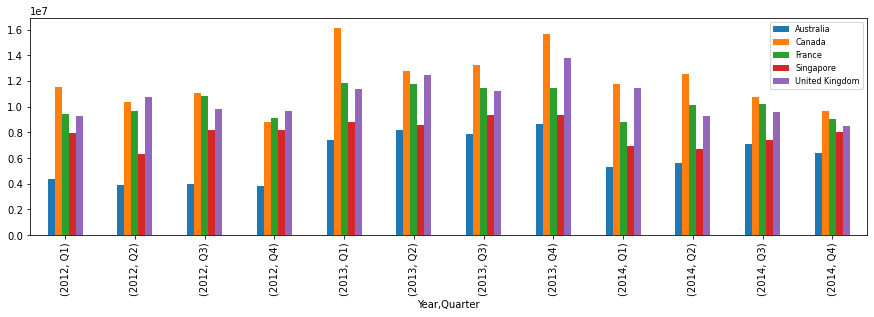

In [14]:
# Same shown graphically
CT.plot(kind = "bar", figsize = (15,4))
plt.legend(fontsize = 8)
plt.show()

In [15]:
# Product wise sales 
sports.groupby("Product")[['Revenue','Quantity']].sum()

,Revenue,Quantity
Product,,
Aloe Relief,84171.62,18872
Astro Pilot,6895290.00,44535
Auto Pilot,1410705.00,6003
Bear Edge,2471054.24,62458
Bear Survival Edge,1957198.58,22611
...,...,...
TrailChef Kettle,5053075.02,463041
TrailChef Kitchen Kit,3820254.30,168650
TrailChef Single Flame,8567247.75,135529


In [16]:
# Function to get Top 5 products by Quantity sold followed by their sales statistics
def top_5_qty():
    out = sports.groupby("Product")['Quantity'].sum().sort_values(ascending = False).head(5).reset_index()
    Summ = sports[sports.Product.isin(out.Product)].groupby("Product")['Revenue'].agg([min,'mean', 'median', max, sum]).round(2)
    return "Top 5 products by qty:", out, "Their Revenues:", Summ

In [17]:
top_5_qty()

('Top 5 products by qty:',
                Product  Quantity
 0  TrailChef Water Bag    830072
 1    Granite Carabiner    789776
 2          Single Edge    709113
 3     TrailChef Kettle    463041
 4        TrailChef Cup    368585,
 'Their Revenues:',
                           min      mean    median        max         sum
 Product                                                                 
 Granite Carabiner     4411.56  27378.86  20647.10  104823.20  3011675.00
 Single Edge          12826.68  49995.07  42435.49  200382.84  8599151.26
 TrailChef Cup         2200.67   6813.04   5892.12   31949.07  1144590.82
 TrailChef Kettle      7922.76  28874.71  26488.33   89402.82  5053075.02
 TrailChef Water Bag   7000.89  24764.11  23424.92  115835.32  4531832.98)

In [18]:
# Creating a variable Profit as Revenue x Gross Margin
sports['Profit'] = sports['Revenue'] * sports['Gross margin']

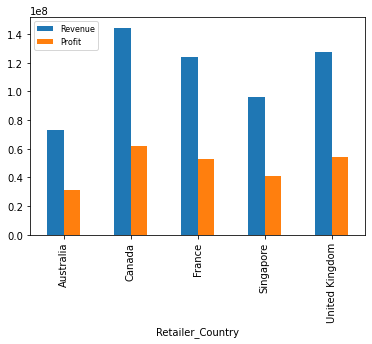

In [19]:
# Total Revenue and Profit by each retailer country shown as a grouped bar chart
sports.groupby("Retailer_Country")[['Revenue','Profit']].sum().plot(kind="bar", stacked = False)
plt.legend(loc = "upper left", fontsize = 8)
plt.show()

In [20]:
# Filter Top 15 products by Year of your choice
def top_prod_YR(Y):    
    return sports[sports['Year'] == Y].groupby('Product')['Revenue'].sum().sort_values(ascending = False).head(15)

In [21]:
top_prod_YR(2014)

Product
Hailstorm Titanium Woods Set         7885833.86
Canyon Mule Journey Backpack         6525692.59
Hailstorm Titanium Irons             6266631.65
Canyon Mule Weekender Backpack       5192394.59
Hailstorm Steel Woods Set            4704890.40
Lady Hailstorm Titanium Woods Set    4696730.28
Hibernator Extreme                   4533352.44
Hibernator                           4079421.26
Husky Rope 100                       4019143.32
Lady Hailstorm Titanium Irons        3820834.68
Granite Extreme                      3762532.00
Canyon Mule Extreme Backpack         3761128.48
Hailstorm Steel Irons                3670426.68
Hibernator Lite                      3291876.99
Glacier GPS Extreme                  3202255.98
Name: Revenue, dtype: float64

In [22]:
# Filter Top N products by year of your choice
def topn_prod_YR(Y, n):    
    return sports[sports['Year'] == Y].groupby('Product')['Revenue'].sum().sort_values(ascending = False).head(n)

In [23]:
topn_prod_YR(2013,7)

Product
Hailstorm Titanium Woods Set         9744719.61
Canyon Mule Journey Backpack         7846683.66
Hailstorm Titanium Irons             7611249.31
Canyon Mule Weekender Backpack       6888906.42
Hibernator Extreme                   6391393.68
Lady Hailstorm Titanium Woods Set    5971966.99
Hailstorm Steel Woods Set            5931799.20
Name: Revenue, dtype: float64

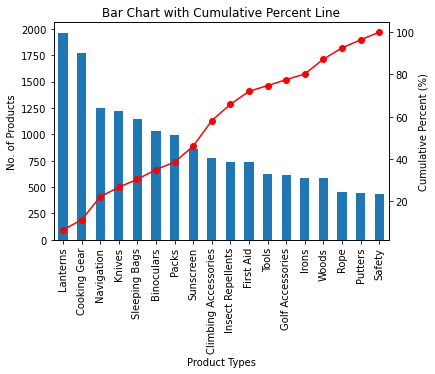

In [24]:
# Dual Axis chart showing count of products sold by product type with cumulative % line to get most bought product types
cumulative_percent = np.cumsum(sports.groupby('Product_Type')['Product'].count()) * 100 / sports.Product.count()
ax = sports.groupby('Product_Type')['Product'].count().sort_values(ascending = False).plot(kind ="bar")

# Add the cumulative percent line
ax2 = ax.twinx()
ax2.plot(sports.Product_Type.unique(), cumulative_percent, color='r', marker ="o")
ax2.set_ylabel('Cumulative Percent (%)')
# Set labels and title
ax.set_xlabel('Product Types')
ax.set_ylabel('No. of Products')
ax.set_title('Bar Chart with Cumulative Percent Line')
plt.show()

In [28]:
# Product category and change in their sales on YoY basis
CT = pd.crosstab(index = sports["Product_Category"], columns = sports["Year"], values = sports["Quantity"], aggfunc= sum).reset_index()
CT

Year,Product_Category,2012,2013,2014
0,Camping Equipment,1512525,1843072,1415053
1,Golf Equipment,314913,375100,295358
2,Mountaineering Equipment,648971,919270,923531
3,Outdoor Protection,1053574,409637,181532
4,Personal Accessories,564592,768589,622743


In [29]:
# Function to get %age change in sales on YoY basis
def perc_change(x):
    s = np.array([[None, None, None],[None, None, None],[None, None, None],[None, None, None],[None, None, None]])
    for i in range(0, len(x)):
        for j in [2012]:
            for k in range(1,2):
                s[i,k] = ((x.loc[i, j+1] - x.loc[i,j]) *100 / x.loc[i, j+1]).round(2)
        for j in [2013]:
            for k in range(2,3):
                s[i,k] = ((x.loc[i, j+1] - x.loc[i,j]) *100 / x.loc[i, j+1]).round(2)       
    return "**%age Change on YoY basis**", pd.DataFrame(s).rename(columns = {0: 2012, 1:2013, 2:2014}).rename(CT['Product_Category'])

In [30]:
perc_change(CT)

('**%age Change on YoY basis**',
                           2012   2013    2014
 Camping Equipment         None  17.93  -30.25
 Golf Equipment            None  16.05   -27.0
 Mountaineering Equipment  None   29.4    0.46
 Outdoor Protection        None -157.2 -125.66
 Personal Accessories      None  26.54  -23.42)

In [31]:
# Evaluate the KPI of your choice for each retailer country
def stat(x):
    if x in ['Revenue', 'Quantity', 'Profit']:
        return sports.groupby('Retailer_Country')[x].sum().astype(int).reset_index()
    else:
        print("Invalid Input!")

In [34]:
stat('Revenue')

,Retailer_Country,Revenue
0,Australia,72668226
1,Canada,144362366
2,France,123790664
3,Singapore,95829367
4,United Kingdom,127116808


In [35]:
# Comparision of monthly average and moving average ( Moving Average = average of previous three months including that month)
for i in sports.groupby("Month").Revenue.mean().index:
    if i >= 3:
        ma = np.nanmean([sports.groupby("Month").Revenue.mean()[i], sports.groupby("Month").Revenue.mean()[i-1], \
        sports.groupby("Month").Revenue.mean()[i-2]])
        print("Mon:", i,"\n", "Moving Average: ", ma.round(2), ", Average Sales: ", sports.groupby("Month").Revenue.mean()[i].round(2))

Mon: 3 
 Moving Average:  34791.79 , Average Sales:  35341.53
Mon: 4 
 Moving Average:  34171.95 , Average Sales:  33127.67
Mon: 5 
 Moving Average:  34245.24 , Average Sales:  34266.52
Mon: 6 
 Moving Average:  34445.56 , Average Sales:  35942.48
Mon: 7 
 Moving Average:  35462.34 , Average Sales:  36178.01
Mon: 8 
 Moving Average:  35499.34 , Average Sales:  34377.52
Mon: 9 
 Moving Average:  34711.06 , Average Sales:  33577.64
Mon: 10 
 Moving Average:  34352.21 , Average Sales:  35101.48
Mon: 11 
 Moving Average:  34637.43 , Average Sales:  35233.17
Mon: 12 
 Moving Average:  35103.68 , Average Sales:  34976.38


In [36]:
# Same thing shown pictorically
ma = []
mean = []
for i in sports.groupby("Month").Revenue.mean().index:
    if i >= 3:
        ma.append(np.nanmean([sports.groupby("Month").Revenue.mean()[i], sports.groupby("Month").Revenue.mean()[i-1], \
        sports.groupby("Month").Revenue.mean()[i-2]]))
        mean.append(sports.groupby("Month").Revenue.mean()[i])
df= pd.DataFrame(ma, mean).reset_index()

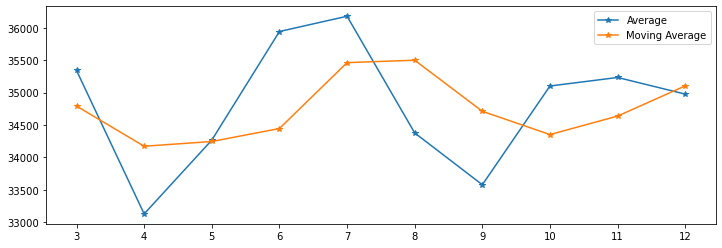

In [37]:
# Monthly comparision of overall average and moving average
df.plot(kind = "line", figsize = (12,4), marker = "*")
plt.legend(['Average', 'Moving Average'])
plt.xticks(range(0,len([3,4,5,6,7,8,9,10,11,12])), [3,4,5,6,7,8,9,10,11,12])
plt.show()